In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as plty
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.preprocessing import StandardScaler

# Data Collection

In [2]:
airline_df=pd.read_csv(r"C:\Users\LENOVO\Desktop\data analyst\datasets\air passenger\air passengers.csv")

In [3]:
airline_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
airline_df.shape

(103904, 25)

In [5]:
airline_df.tail(7)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
103897      103897  102203  Female     Loyal Customer   60  Business travel   
103898      103898   60666    Male     Loyal Customer   50  Personal Travel   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
103897  Business             1599                      5   
103898       Eco             1620                      3   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
103897                                  5  ...                       4   
103898                                  1  ...                       2   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
103897                 4                 4                 4                4   
103898                 4                 3                 4                2   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
103897                 4            4                           9   
103898                 4            2                           0   
103899                 3            2                           3   
103900                 5            4                           0   
103901                 5            4                           7   
103902                 4            1                           0   
103903                 3            1                           0   

        Arrival Delay in Minutes             satisfaction  
103897                       7.0                satisfied  
103898                       0.0  neutral or dissatisfied  
103899                       0.0  neutral or dissatisfied  
103900                       0.0                satisfied  
103901                      14.0  neutral or dissatisfied  
103902                       0.0  neutral or dissatisfied  
103903                       0.0  neutral or dissatisfied  

[7 rows x 25 columns]

# Analysing and Cleaning Data

In [6]:
airline_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
airline_df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
airline_df.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [10]:
airline_df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
# Filling the missing values of 'Arrival Delay in Minutes' with mean value
Arrival_Delay_mean=airline_df['Arrival Delay in Minutes'].mean()
Arrival_Delay_mean

15.178678301832152

In [12]:
airline_df['Arrival Delay in Minutes'].fillna(value=Arrival_Delay_mean,inplace=True)

In [13]:
airline_df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

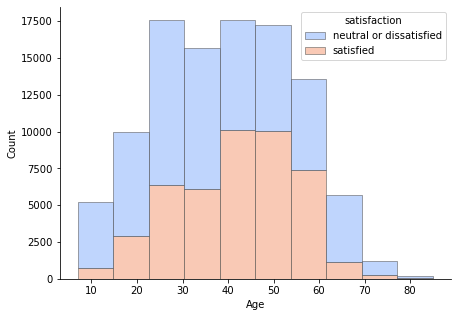

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(x='Age',hue='satisfaction',multiple="stack",bins=10,palette='coolwarm',
              edgecolor=".3",
              linewidth=.5,data=airline_df)
sns.despine()
# Thus we can see that people in age group 25-55 are more dissatisfied

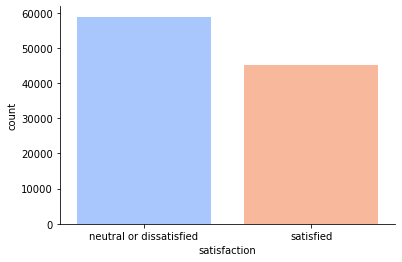

In [15]:
sns.countplot(x='satisfaction',palette='coolwarm',saturation=2.0,data=airline_df)
sns.despine()

In [16]:
airline_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [17]:
data=[58879,45025]
keys=['unsatisfied passengers','satisfied passengers']
palette_color = sns.color_palette('bright')

([<matplotlib.patches.Wedge at 0x295bddc3d60>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'unsatisfied passengers'),
  Text(0.228705062722272, -1.0759618925804026, 'satisfied passengers')],
 [Text(-0.12474821603032998, 0.5868883050438559, '57%'),
  Text(0.12474821603033018, -0.5868883050438559, '43%')])

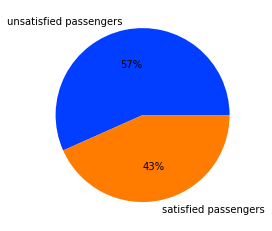

In [18]:
plt.pie(data,labels=keys,autopct='%.0f%%',colors=palette_color)

In [19]:
airline_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [20]:
airline_df['Cleanliness'].mean()
# Thus cleanliness on average is poor

3.2863508623344626

In [21]:
airline_df['Flight Distance'].mean()

1189.4483754234677

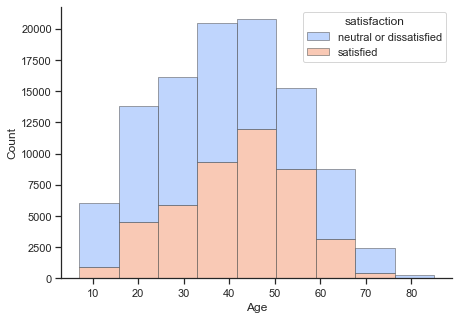

In [22]:
sns.set_theme(style="ticks")
plt.figure(figsize=(7,5))
sns.histplot(x='Age',hue='satisfaction',data=airline_df,bins=9,
              multiple="stack",
              palette="coolwarm",
              edgecolor=".3",
              linewidth=.5)
sns.despine()
# Thus we can see that age group 35-50 are most dissatisfied

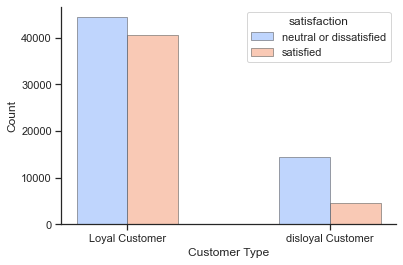

In [23]:
sns.set_style("ticks")
sns.histplot(x='Customer Type',hue='satisfaction',data=airline_df,bins=2,multiple="dodge",shrink=0.5
            ,palette='coolwarm',edgecolor=".3",
            linewidth=.5)
sns.despine()
# Thus disloyal customers are more dissatisfied

In [24]:
airline_df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

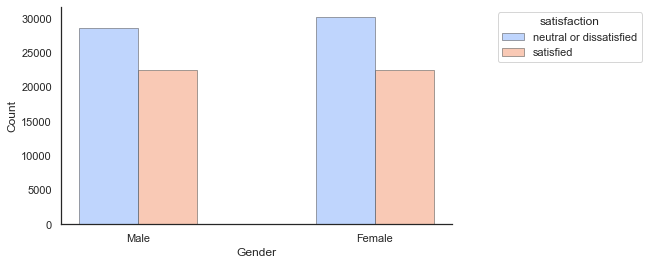

In [25]:
sns.set_style('white')
plt.figure(figsize=(7,4))
ax=sns.histplot(x="Gender",hue="satisfaction",data=airline_df,multiple="dodge",shrink=0.5,
            edgecolor=".3",
            palette='coolwarm',
            linewidth=.5)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.5, 1))
sns.despine()

In [26]:
airline_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

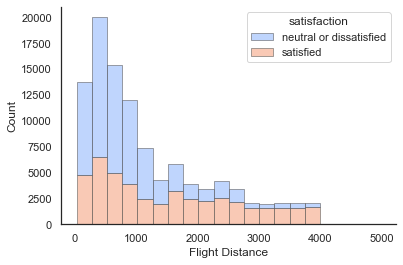

In [27]:
sns.histplot(x='Flight Distance',hue='satisfaction',data=airline_df,bins=20,multiple="stack",
             edgecolor=".3",
             palette='coolwarm',
             linewidth=.5)
sns.despine()
# shorter flights must be taken care of more

In [28]:
# Thus we can see that shorter duration flights have more satisfied customers

In [29]:
airline_df['Cleanliness'].head()

0    5
1    1
2    5
3    2
4    3
Name: Cleanliness, dtype: int64

<AxesSubplot:xlabel='Cleanliness', ylabel='Count'>

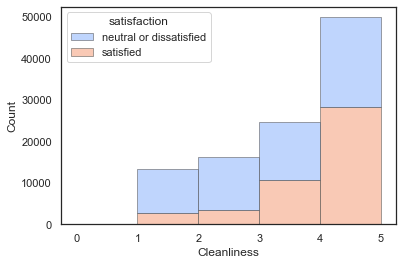

In [30]:
sns.histplot(x='Cleanliness',hue='satisfaction',data=airline_df,multiple="stack",bins=5,
             edgecolor=".3",
             palette='coolwarm',
             linewidth=.5)
# Thus flights must be clean to ensure satisfaction

In [31]:
# Thus we can see that as cleanliness increases satisfied passengers are more

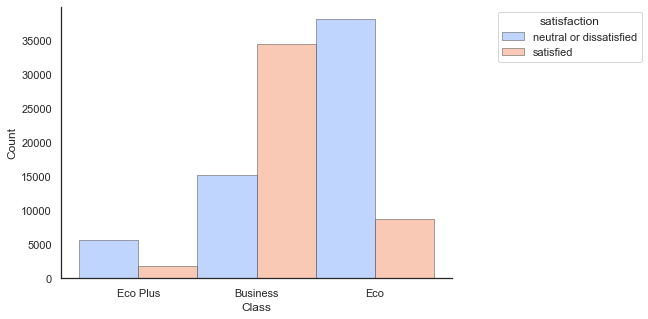

In [32]:
plt.figure(figsize=(7,5))
ax=sns.histplot(x='Class',hue='satisfaction',data=airline_df,multiple="dodge",
             edgecolor=".3",
            palette='coolwarm',
            linewidth=.5,bins=2)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.5,1))
sns.despine()
# Economy class passengers must be catered to more

In [33]:
# Thus Biz class passengers are most satisfied while Eco class passengers are least satisfied

In [34]:
airline_df['Type of Travel'].head()

0    Personal Travel
1    Business travel
2    Business travel
3    Business travel
4    Business travel
Name: Type of Travel, dtype: object

<AxesSubplot:xlabel='Type of Travel', ylabel='Count'>

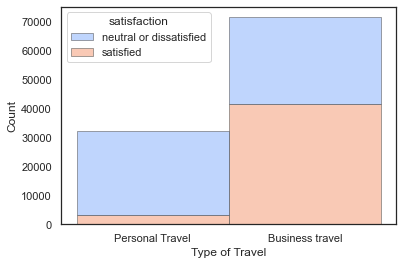

In [35]:
sns.histplot(x='Type of Travel',hue='satisfaction',data=airline_df,multiple="stack",
            palette='coolwarm'
            ,linewidth=.5,
            edgecolor=".3")
# People on personal travel needs more catering

In [36]:
airline_df['satisfaction'].iplot(kind="hist",bins=5,bargap=0)

# Training and Testing Data

In [37]:
# Conversion to numeric values  

airline_df['Type of Travel'].replace(regex={"Personal Travel":0,"Business travel":1},inplace=True)
airline_df['Class'].replace(regex={"Eco":1,"Eco Plus":2,"Business":3},inplace=True)
airline_df['Class'].replace(regex={"Eco":1,"Eco Plus":2,"Business":3},inplace=True)
airline_df['satisfaction'].replace(regex={"neutral or dissatisfied":0,"satisfied":1},inplace=True)
airline_df['Customer Type'].replace(regex={"disloyal Customer":0,"Loyal Customer":1},inplace=True)


hm=airline_df[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']]

<AxesSubplot:>

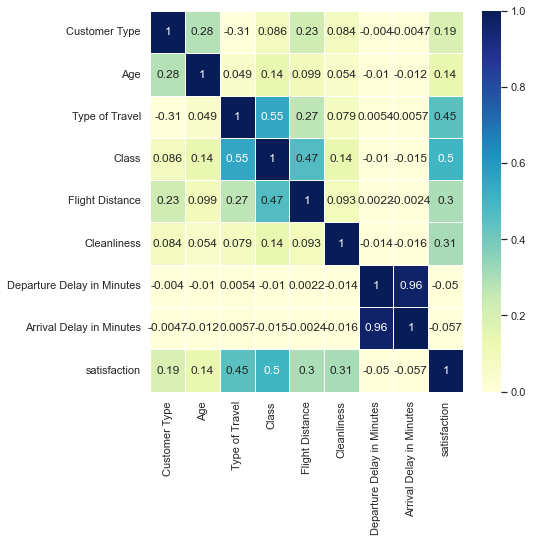

In [38]:
tc=hm.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(tc,annot=True,cmap="YlGnBu",vmin=0,vmax=1,linewidths=0.7)

In [39]:
# Thus we can see the most important factors for satisfaction are
# Type of travel(R)
# Class(R)
# Cleanliness(R)
# Flight Distance(R)
# Customer Type(R)
# Age(R)

In [40]:
X=airline_df[['Type of Travel','Class','Cleanliness','Flight Distance','Customer Type','Age']]
y=airline_df['satisfaction']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

# scaler=StandardScaler()

In [44]:
logmodel.fit(X_train,y_train)  

LogisticRegression(max_iter=1000)

In [45]:
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)
# y_

In [46]:
predictions=logmodel.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Accuracy Check

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     17555
           1       0.80      0.78      0.79     13617

    accuracy                           0.82     31172
   macro avg       0.82      0.82      0.82     31172
weighted avg       0.82      0.82      0.82     31172



In [48]:
confusion_matrix(y_test,predictions)

array([[14946,  2609],
       [ 2948, 10669]], dtype=int64)

In [49]:
accuracy_score(y_test,predictions)*100
# Thus 82 percent accuracy

82.17310406775312